In [1]:
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
import os
# Get the current working directory (should be 'Codes' if running interactively)
current_dir = os.getcwd()
# Navigate up to 'FHN'
fhn_dir = os.path.abspath(os.path.join(current_dir, '..'))
# Change the working directory to 'FHN'
os.chdir(fhn_dir)

import sys
sys.path.insert(1, 'Codes/')
from myUtils import *
PATHL = file_path = os.path.join(fhn_dir, 'Data', 'OUTPUT', 'FHN', 'FHN_{window}_{year}_facnormalized.tif')

MAINPATH is set to: /home/emanuele/Research/APES/FHN


# 1. Import Shapefile

In [2]:
# Load shapefile and reproject
shapef = os.path.join(fhn_dir, 'Data/SHAPEFILES/world-administrative-boundaries.shp')
gdf = gpd.read_file(shapef)
gdf = gdf.to_crs("ESRI:54009")

# 2. 2020

In [27]:
# Figure 2A
window = 50
year = 2020
file_raster_path = PATHL.format(window=window, year=year)
data, src = read_raster(file_raster_path)
data = data*1000
quantile_values = [0, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99]
quantiles = np.nanquantile(data, quantile_values)
quantiles

array([3.08856510e-13, 7.05378080e-09, 1.17629725e-07, 1.87811344e-06,
       4.32532815e-05, 1.36219058e-03, 1.82980327e-01])

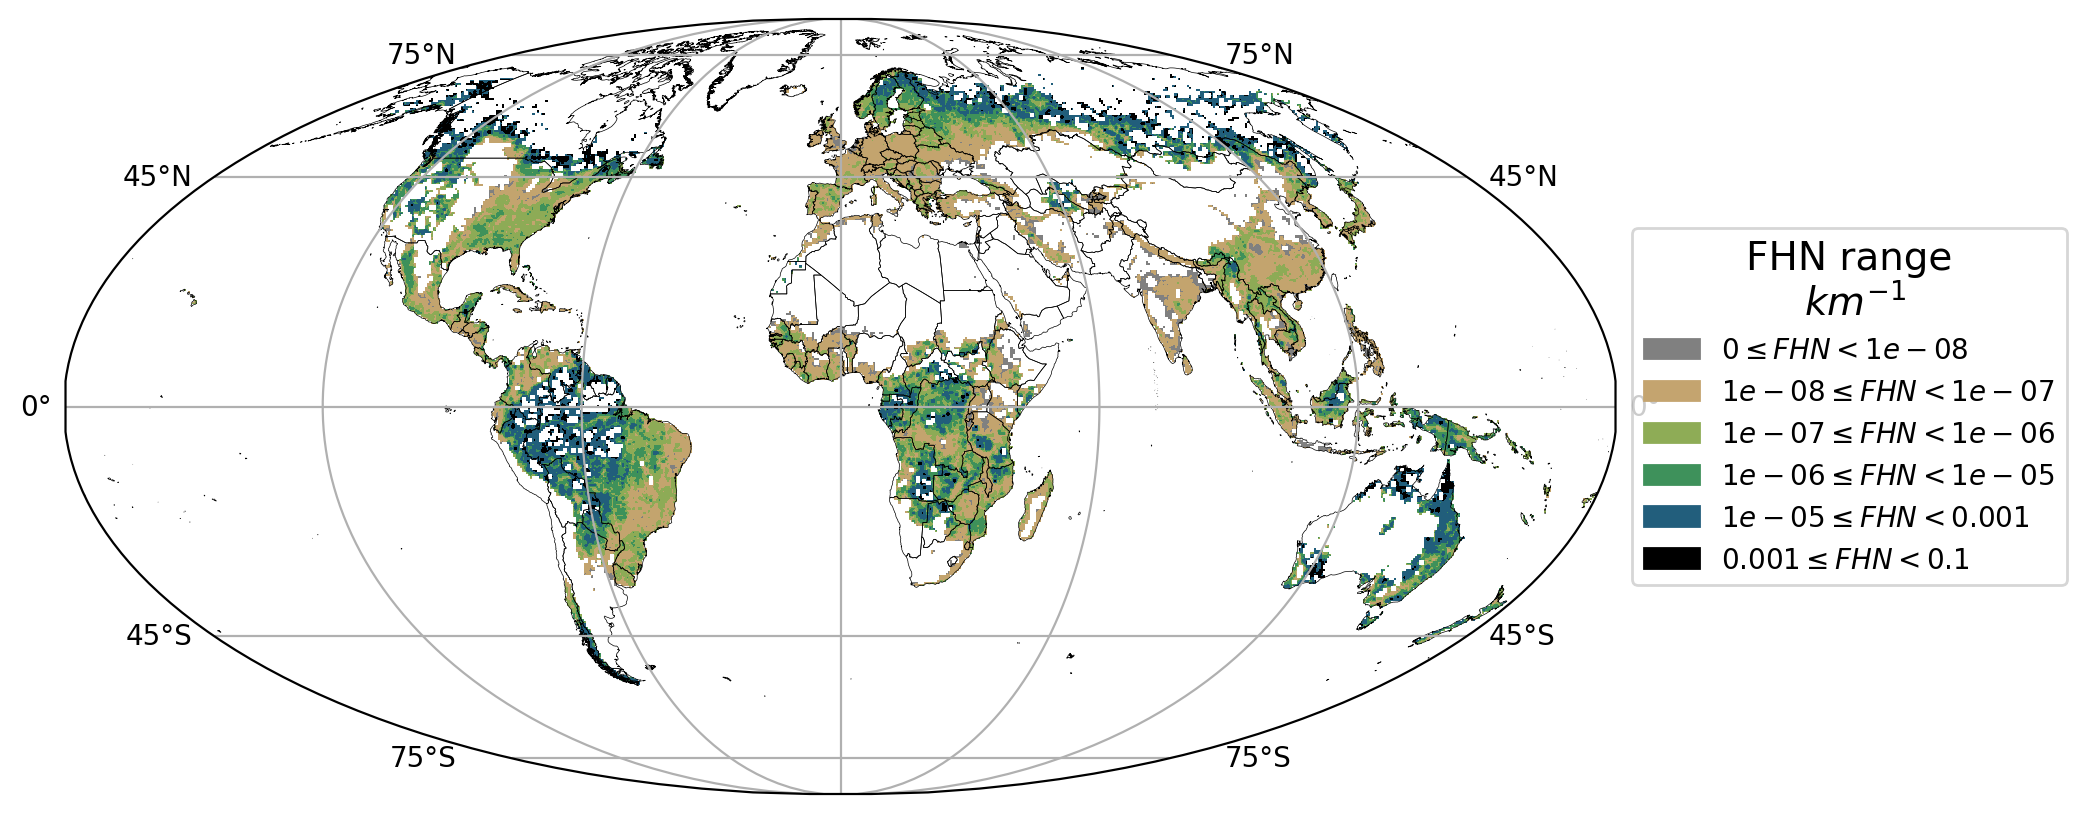

In [24]:

# Definecolormap for plotting
values =  [0, 1e-9, 1e-7, 1e-6, 1e-5, 1e-3, 1e-1]

#values = [0, 1, 50, 1e2, 1e3, 1e4, 1e5, 1e6]
#values = [f"{val:.0e}".replace('e+0', r'\times 10^{').replace('e-0', r'\times 10^{-').replace('e+', r'\times 10^{').replace('e-', r'\times 10^{-').rstrip('0').replace('^0', '') + '}' for val in values]


cmap = plt.get_cmap('gist_earth_r')
n_colors = len(values)-1
colors = [cmap(i / (n_colors - 1)) for i in range(n_colors)]
colors[0] = 'gray'
cmap, ncolors = ListedColormap(colors), len(colors)
norm = BoundaryNorm(values, ncolors=ncolors, clip=True)


# Plot Figure 1A
fig = plt.figure(figsize=(10, 20))
ax = plt.axes(projection=crsplot)
ax = set_font(ax, 20)
gdf.boundary.plot(ax=ax, color='black', lw=.25)
plot_data_maps(ax, data, cmap, norm, src)


values_str = [0, 1e-8, 1e-7, 1e-6, 1e-5, 1e-3, 1e-1]
legend_patches = [Patch(color=colors[i], label=rf'${values_str[i]} \leq FHN < {values_str[i+1]}$') for i in range(n_colors)]
#legend_patches.append(Patch(color=colors[-1], label=rf'$FHN = {values_str[-1]}$'))
#add_legend(ax, legend_patches, 'FPP range\n ' + r'$person$')
title = 'FHN range\n ' + r'$km^{-1}$'
legend = ax.legend(handles=legend_patches, 
                   loc='center right', 
                   bbox_to_anchor=(1.3, 0.5), 
                   title=title, title_fontsize=14)
legend.get_title().set_ha('center')

1e-15

### 2.1 Save the figure

In [19]:
fout = os.path.join(fhn_dir, 'Figures/Figure3A_facnormalized.tiff')
fig.savefig(fout, dpi=300, bbox_inches = 'tight')

# 3. Trend

In [9]:
year = 1975
file_raster_path = PATHL.format(window=window, year=year)
data0, src = read_raster(file_raster_path)
dataTrend = (data - data0) / (2020-1975)

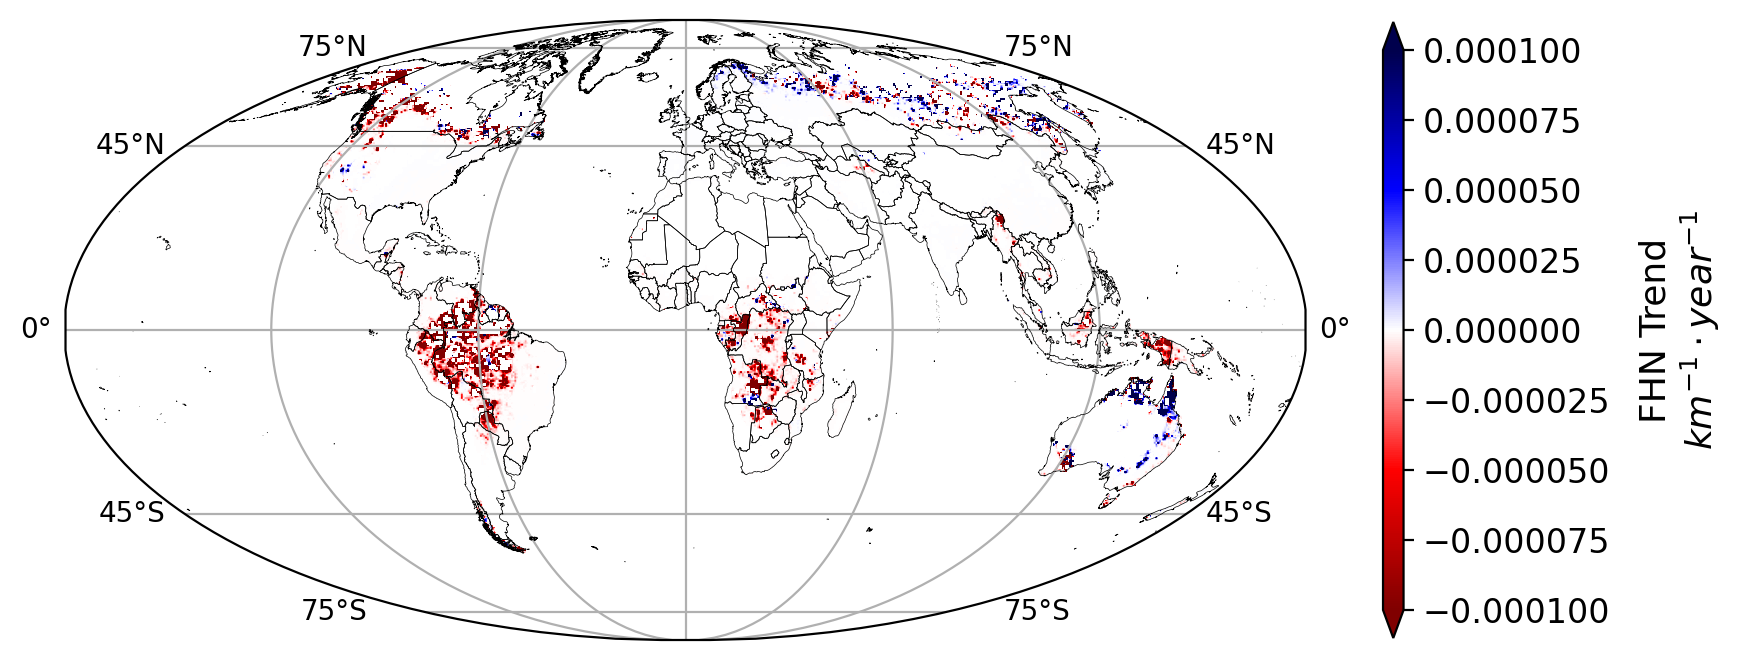

In [12]:
vmin = -0.0001
vmax = 0.0001
# 2. Define the colormap
cmap = plt.get_cmap('seismic_r')  # You can change 'Blues' to any other colormap name


# 3. Plot
import matplotlib as mpl
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=crsplot)
ax = set_font(ax, 20)
"""Plot the raster data with the provided axis, colormap, and normalization."""
ax.set_extent([-18000000, 18000000, -9000000, 9000000], crs=crsplot)
ax.add_feature(cfeature.OCEAN, facecolor='white')
ax.add_feature(cfeature.LAND, facecolor='white')
gl = ax.gridlines(draw_labels=True, x_inline=False, y_inline=False)
gl.ylocator = mticker.FixedLocator([-75, -45, 0, 45, 75])
gl.top_labels = False
gl.bottom_labels = False
gdf.boundary.plot(ax=ax, color='black', lw=.25)
show(dataTrend, cmap=cmap, vmin=vmin, vmax=vmax, ax=ax, transform=src.transform)
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap='seismic_r', norm=norm)
sm.set_array([])
# Add a colorbar with extend
# Add a colorbar with the desired size and aspect ratio
cbar = fig.colorbar(sm, ax=ax, extend='both', shrink=0.4, aspect=30)
cbar.set_label('FHN Trend\n'+r'$km^{-1} \cdot year^{-1}$', fontsize=13, labelpad=10)
# Customize colorbar label size (optional)
cbar.ax.tick_params(labelsize=12)


In [17]:
fout = os.path.join(fhn_dir, 'Figures/Figure3B_trend.tiff')
fig.savefig(fout, dpi=300, bbox_inches = 'tight')

In [13]:
dataRelDiff = 100*(data - data0) / (data0)

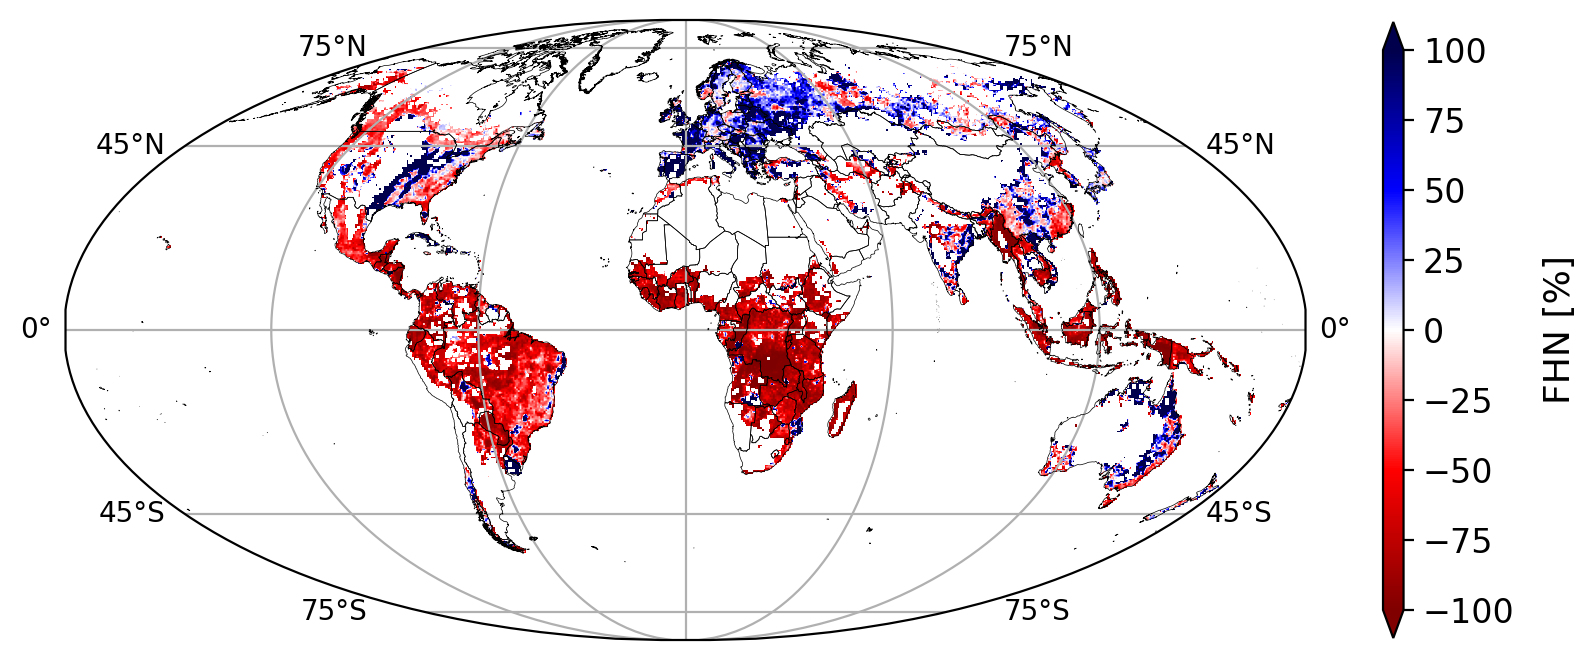

In [15]:
vmin = -100
vmax = 100
# 2. Define the colormap
cmap = plt.get_cmap('seismic_r')  # You can change 'Blues' to any other colormap name


# 3. Plot
import matplotlib as mpl
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=crsplot)
ax = set_font(ax, 20)
"""Plot the raster data with the provided axis, colormap, and normalization."""
ax.set_extent([-18000000, 18000000, -9000000, 9000000], crs=crsplot)
ax.add_feature(cfeature.OCEAN, facecolor='white')
ax.add_feature(cfeature.LAND, facecolor='white')
gl = ax.gridlines(draw_labels=True, x_inline=False, y_inline=False)
gl.ylocator = mticker.FixedLocator([-75, -45, 0, 45, 75])
gl.top_labels = False
gl.bottom_labels = False
gdf.boundary.plot(ax=ax, color='black', lw=.25)
show(dataRelDiff, cmap=cmap, vmin=vmin, vmax=vmax, ax=ax, transform=src.transform)
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(cmap='seismic_r', norm=norm)
sm.set_array([])
# Add a colorbar with extend
# Add a colorbar with the desired size and aspect ratio
cbar = fig.colorbar(sm, ax=ax, extend='both', shrink=0.4, aspect=30)
cbar.set_label('FHN [%]', fontsize=13, labelpad=10)
# Customize colorbar label size (optional)
cbar.ax.tick_params(labelsize=12)

In [22]:
fout = os.path.join(fhn_dir, 'Figures/Figure3B_relDiff.tiff')
fig.savefig(fout, dpi=300, bbox_inches = 'tight')